# Predição de câncer de mama

* Aqui eu demonstro como usar algumas técnicas mais elaboradas de machine learning. 
* Vamos aplicar essas tecnicas no dataset 'breast_cancer.csv' que traz os dados de mamas com cancer, onde aqui vamos prever se o cancer é benigno (0) ou maligno (1).
* O foco aqui não é o score em sí e nem a análise de dados, e sim demonstrar essas técnicas. 
* Algumas dessas tecnicas são: cross validation, hyper parameters, feature importances, uma função auxíliar que vai otimizar nosso tempo e outros...


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('entradas_breast.csv')
test = pd.read_csv('saidas_breast.csv')

In [4]:
df = train
df_test = test

In [5]:
df.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758


In [6]:
df_test.head(3)

,0
0,0
1,0
2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 radius_mean                569 non-null float64
 texture_mean               569 non-null float64
 perimeter_mean             569 non-null float64
 area_mean                  569 non-null float64
 smoothness_mean            569 non-null float64
 compactness_mean           569 non-null float64
 concavity_mean             569 non-null float64
concave_points_mean         569 non-null float64
 symmetry_mean              569 non-null float64
 fractal_dimension_mean     569 non-null float64
 radius_se                  569 non-null float64
 texture_se                 569 non-null float64
 perimeter_se               569 non-null float64
 area_se                    569 non-null float64
 smoothness_se              569 non-null float64
 compactness_se             569 non-null float64
 concavity_se               569 non-null float64
 concave_points_se          569 non-null float64
 symmetry_se 

In [8]:
df.isnull().sum()

 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
concave_points_mean         0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave_points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave_points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
dtype: int64

In [9]:
df.columns

Index([' radius_mean', ' texture_mean', ' perimeter_mean', ' area_mean',
       ' smoothness_mean', ' compactness_mean', ' concavity_mean',
       'concave_points_mean', ' symmetry_mean', ' fractal_dimension_mean',
       ' radius_se', ' texture_se', ' perimeter_se', ' area_se',
       ' smoothness_se', ' compactness_se', ' concavity_se',
       ' concave_points_se', ' symmetry_se', ' fractal_dimension_se',
       ' radius_worst', ' texture_worst', ' perimeter_worst', ' area_worst',
       ' smoothness_worst', ' compactness_worst', ' concavity_worst',
       ' concave_points_worst', ' symmetry_worst', ' fractal_dimension_worst'],
      dtype='object')

In [10]:
X = df
y = df_test

##### Esse X.columns é so pra ver o nome das minhas colunas e depois passar quais colunas vou usar.
Isso porque la em baixo vamos usar o feature importances e vamos ver quais colunas tem mais valor para determinado modelo. Entao as que nao forem boas la em baixo nos tiramos aqui em cima

In [11]:
X.columns

Index([' radius_mean', ' texture_mean', ' perimeter_mean', ' area_mean',
       ' smoothness_mean', ' compactness_mean', ' concavity_mean',
       'concave_points_mean', ' symmetry_mean', ' fractal_dimension_mean',
       ' radius_se', ' texture_se', ' perimeter_se', ' area_se',
       ' smoothness_se', ' compactness_se', ' concavity_se',
       ' concave_points_se', ' symmetry_se', ' fractal_dimension_se',
       ' radius_worst', ' texture_worst', ' perimeter_worst', ' area_worst',
       ' smoothness_worst', ' compactness_worst', ' concavity_worst',
       ' concave_points_worst', ' symmetry_worst', ' fractal_dimension_worst'],
      dtype='object')

In [12]:
# Colunas escolhidas
cols = [' radius_mean', ' texture_mean', ' perimeter_mean', ' area_mean',
       ' smoothness_mean', ' compactness_mean', ' concavity_mean',
       'concave_points_mean', ' symmetry_mean', ' fractal_dimension_mean',
       ' radius_se', ' texture_se', ' perimeter_se', ' area_se',
       ' smoothness_se', ' compactness_se', ' concavity_se',
       ' concave_points_se', ' symmetry_se', ' fractal_dimension_se',
       ' radius_worst', ' texture_worst', ' perimeter_worst', ' area_worst',
       ' smoothness_worst', ' compactness_worst', ' concavity_worst',
       ' concave_points_worst', ' symmetry_worst', ' fractal_dimension_worst']

In [13]:
X = X[cols]

In [14]:
X.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# MODELO FUNCAO AUXILIAR

In [17]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, 
                              ExtraTreesClassifier, RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    # Para treinar o modelo
    def fit(self,x,y):
        return self.clf.fit(x,y)
    # A importancia dos recursos para determinado modelo preditivo
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    # Pega o R quadrado
    def score(self,x,y):
        return self.clf.score(x,y)

In [19]:
# Modelos que vamos treinar de uma vez
modelos = [{'nome': 'logreg', 'modelo': LogisticRegression},
           {'nome': 'etree', 'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost', 'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost', 'modelo': AdaBoostClassifier},
           {'nome': 'SVC', 'modelo': SVC},
           {'nome': 'KNN', 'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB', 'modelo': GaussianNB},
           {'nome': 'Perceptron', 'modelo': Perceptron},
           {'nome': 'LinearSVC', 'modelo': LinearSVC},
           {'nome': 'SGD', 'modelo': SGDClassifier},
           {'nome': 'Dtree', 'modelo': DecisionTreeClassifier},
           {'nome': 'RForest', 'modelo': RandomForestClassifier}]

In [20]:
# Treina com todos os nossos modelos superficialmente para termos uma noção de quais sao os melhores
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])  
    x.fit(X_train, y_train) 
    x_pred = x.predict(X_test)
    acuracidade = round(x.score(X_test, y_test)*100,2) 
    resultados.append({'nome': model['nome'], 'score': acuracidade, 'pred': x_pred })
models_resultados = pd.DataFrame(resultados)

In [21]:
models_resultados

,nome,score,pred
0,logreg,92.98,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, ..."
1,etree,96.49,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, ..."
2,gradboost,94.74,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, ..."
3,adaboost,95.32,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, ..."
4,SVC,63.74,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
5,KNN,87.72,"[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, ..."
6,GaussianNB,78.36,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, ..."
7,Perceptron,84.80,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, ..."
8,LinearSVC,90.64,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, ..."
9,SGD,67.25,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ..."


# Hyper-Parametros

* Faz uma pesquisa em grade para descobrir os melhores parametros de determinado modelo
* Ele pega nossos parametros e faz o treino combinando cada um deles e nos traz quais os melhores parametros e seu score
* Aqui vou utilizar como exemplo apenas 3 modelos

In [22]:
from sklearn.model_selection import GridSearchCV

### RANDOM FOREST

In [23]:
param_gd_rf = {
    'n_estimators': [100,200],
    'max_depth': [2,4],
    'min_samples_leaf': [1,2,3]
}

In [24]:
rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_gd_rf, verbose=True)
rf.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    8.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [25]:
score_gd_rf = rf.best_score_
score_gd_rf

0.9673366834170855

In [26]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
pred_gd_rf = rf.predict(X_test)
pred_gd_rf

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

# GRAD BOOST

In [28]:
param_gd_gb = {
    'n_estimators': [100,200],
    'min_samples_leaf': [1,2,3]
}

In [29]:
gd = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_gd_gb, verbose=True)
gd.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [30]:
score_gd_gb = gd.best_score_
score_gd_gb

0.964824120603015

In [31]:
gd.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
pred_gd_gb = gd.predict(X_test)
pred_gd_gb

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

# ADABOOST

In [33]:
param_gd_ab = {
    'n_estimators': [100,200]
}

In [34]:
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_gd_ab, verbose=True)
gd.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None, param_grid={'n_estimators': [100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [35]:
score_gd_ab = gd.best_score_
score_gd_ab

0.9698492462311558

In [36]:
gd.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [37]:
pred_gd_ab = gd.predict(X_test)
pred_gd_ab

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

# Ensembling

##### Uma forma de aumentar a acuracidade ou performance do modelo preditivo. 
##### Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:
* 1 - Classificão de Votos (Voting Classifier)
* 2 - Ensacamento (Bagging)
* 3 - Impulsionamento (Boosting)

#### Validação Cruzada

* Com o k-fold (cross validation), nós tambem fazermos a divisão entre treino e teste, porém, fazemos mais de uma vez. quantas vezes? Você escolhe Essa quantidade de vezes. Nós chamamos de kfold ou cv(cross validation), e geralmente é usado o numero 10. O que acontece é que quando fazemos a 1 divisão, nosso prog pega determinados dados e tira uma taxa de acerto deles
* Depois fazemos outra divisão (a segunda) e ele embaralha os dados entre treino e teste dnv, e tira mais uma taxa de acerto. Enfim... Ele faz isso para o tanto de vezes colocarmos para fazer no final de tudo nós pegamos todas as taxas e tiramos uma média

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

###                1 - Classificão de Votos (Voting Classifier):

In [39]:
from sklearn.ensemble import VotingClassifier

In [40]:
misturados = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                  ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                  ('RFor',RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=2)),
                  ('LR',LogisticRegression(C=0.05)),
                  ('DT',DecisionTreeClassifier(random_state=123)),
                  ('NB',GaussianNB()),
                  ('svm',SVC(kernel='linear',probability=True))
                 ]

In [41]:
meu_ensemble = VotingClassifier(estimators=misturados, voting='soft').fit(X_train,y_train)

In [42]:
print('Score', meu_ensemble.score(X_test, y_test))

Score 0.9590643274853801


In [43]:
cv_voting_classifier = cross_val_score(meu_ensemble,X_test, y_test, cv=10, scoring='accuracy')

In [44]:
score_voting = cv_voting_classifier.mean()
score_voting

0.9175245098039216

###                          2 - Ensacamento (Bagging):

In [45]:
from sklearn.ensemble import BaggingClassifier

#### --- Ensacamento KNN

In [46]:
knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=100)

In [47]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [48]:
print('Score', knn.score(X_test, y_test))

Score 0.8771929824561403


In [49]:
cv_bagging = cross_val_score(knn,X_test, y_test, cv=10, scoring='accuracy')

In [50]:
score_bagging_knn =  cv_bagging.mean()
score_bagging_knn

0.8597222222222222

#### --- Ensacamento DecisionTree

In [51]:
dtree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [52]:
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [53]:
print('Score', dtree.score(X_test, y_test))

Score 0.9239766081871345


In [54]:
cv_bagging_tree = cross_val_score(dtree,X_test, y_test, cv=10, scoring='accuracy') 

In [55]:
score_bagging_Dtree = cv_bagging_tree.mean()
score_bagging_Dtree

0.9345588235294118

###                      3 - Impulsionamento (Boosting):

#### --- GradientBoostingClassifier

In [56]:
grad = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)

In [57]:
grad.fit(X_train, y_train)
grad_pred = dtree.predict(X_test)
grad_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [58]:
print('Score', grad.score(X_test, y_test))

Score 0.9532163742690059


In [59]:
cv_boosting_grad = cross_val_score(grad, X_test, y_test, cv=10, scoring='accuracy')

In [60]:
score_boosting_gb = cv_boosting_grad.mean()
score_boosting_gb

0.9411356209150327

# Escolhendo qual modelo vamos utilizar com base no score

In [61]:
my_rf = RandomForestClassifier(n_estimators=200, max_depth=4, min_samples_leaf=1)

In [62]:
my_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
score_my_rf = my_rf.score(X_test, y_test)
score_my_rf

0.935672514619883

##### Ultima validacao cruzada

In [64]:
resultado_my_rf = cross_val_score(my_rf, X_train, y_train, cv=10, scoring='accuracy')

In [65]:
score_my_rf_cv = resultado_my_rf.mean()
score_my_rf_cv

0.9623076923076923

In [66]:
pred_my_rf_m = my_rf.predict(X_test)  # Esse é so pra matriz de confusao

In [67]:
# pred_my_rf = my_rf.predict(test_survived)

# Matriz de confusão

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [69]:
matriz = confusion_matrix(y_test, pred_my_rf_m)
matriz

array([[ 56,   6],
       [  5, 104]], dtype=int64)

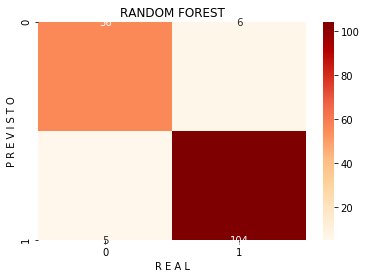

In [70]:
sns.heatmap(confusion_matrix(y_test, pred_my_rf_m), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('RANDOM FOREST')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [71]:
score_matriz = accuracy_score(y_test,pred_my_rf_m)
score_matriz

0.935672514619883

# Feature Importances (Importancia de recursos)

In [72]:
# Aqui devemos passar todos os parametros que achamos de melhor com os hyperparametros
param_model_escolhido = {
    'n_estimators': 200,
    'max_depth': 4,
    'min_samples_leaf': 1,
    'verbose': 0
}

In [73]:
# temos de passar o modelo que escolhemos e seus parametros
my_rf_aux = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=param_model_escolhido)

In [74]:
# aqui temos os resultados das colunas mais importantes
rf_features = my_rf_aux.feature_importances(X_train,y_train)
rf_features

array([0.01953845, 0.01211416, 0.09386166, 0.07517651, 0.00496782,
       0.01796847, 0.04047784, 0.09641234, 0.00345907, 0.00242861,
       0.00637385, 0.0024196 , 0.00957179, 0.03096132, 0.00260175,
       0.00159753, 0.00439824, 0.001715  , 0.00246333, 0.00292549,
       0.0606108 , 0.01662704, 0.16049384, 0.16294476, 0.00907718,
       0.00420166, 0.03201904, 0.11011216, 0.00196547, 0.01051524])

##### Criando um DF

In [75]:
cols_escolhidas_feat = X_train.columns.values

In [76]:
feature_dataframe = pd.DataFrame({'Recursos': cols_escolhidas_feat, 'Importância de Recursos': rf_features})
feature_dataframe

,Recursos,Importância de Recursos
0,radius_mean,0.019538
1,texture_mean,0.012114
2,perimeter_mean,0.093862
3,area_mean,0.075177
4,smoothness_mean,0.004968
5,compactness_mean,0.017968
6,concavity_mean,0.040478
7,concave_points_mean,0.096412
8,symmetry_mean,0.003459
9,fractal_dimension_mean,0.002429


##### Em grafico para ver melhor

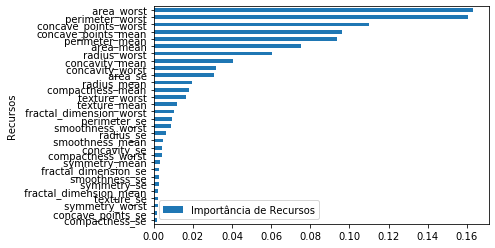

In [77]:
feature_dataframe.sort_values(by='Importância de Recursos').plot.barh(x='Recursos')